**DATA IN**

In [1]:
## Data Analysis Phase
## Main aim is to understand more about the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
## Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

In [2]:
data=pd.read_csv('./volkswagen_e_golf.csv')

## print shape of dataset with rows and columns
print(data.shape)

(3345, 18)


In [3]:
# print the top5 records
data.head()

,manufacturer,model,version,power(kW),fuel_date,trip_distance(km),quantity(kWh),fuel_type,tire_type,city,motor_way,country_roads,driving_style,consumption(kWh/100km),A/C,park_heating,avg_speed(km/h),ecr_deviation
0,Volkswagen,Golf,e-Golf,85,08.02.2019,80,NaN,Electricity,Winter tires,0,0,1,Normal,17.8,0,1,53.0,1.0
1,Volkswagen,Golf,e-Golf,85,06.02.2019,50,12.29,Electricity,Winter tires,0,0,1,Normal,15.5,0,1,47.0,-1.3
2,Volkswagen,Golf,e-Golf,85,05.02.2019,43,8.68,Electricity,Winter tires,0,1,1,Normal,18.0,0,1,58.0,1.2
3,Volkswagen,Golf,e-Golf,85,04.02.2019,44,1.50,Electricity,Winter tires,0,1,1,Normal,16.1,0,1,43.0,-0.7
4,Volkswagen,Golf,e-Golf,85,04.02.2019,76,14.44,Electricity,Winter tires,0,1,0,Normal,19.0,0,1,76.0,2.2


In [4]:
#type checking
data.dtypes

manufacturer               object
model                      object
version                    object
power(kW)                   int64
fuel_date                  object
trip_distance(km)          object
quantity(kWh)             float64
fuel_type                  object
tire_type                  object
city                        int64
motor_way                   int64
country_roads               int64
driving_style              object
consumption(kWh/100km)    float64
A/C                         int64
park_heating                int64
avg_speed(km/h)           float64
ecr_deviation             float64
dtype: object

In [5]:
#type conversion
def tryconvert(value, default, t):
    if t == 'numeric':
        try:
            return float(value)
        except (ValueError, TypeError):
            return default
    if t == 'str':
        try:
            return str(value)
        except (ValueError, TypeError):
            return default

In [6]:

#trip distance is a float value
data['trip_distance(km)'] = data['trip_distance(km)'].map(lambda x : tryconvert(x, np.nan, 'numeric') )

In [7]:
#type checking
data.dtypes

manufacturer               object
model                      object
version                    object
power(kW)                   int64
fuel_date                  object
trip_distance(km)         float64
quantity(kWh)             float64
fuel_type                  object
tire_type                  object
city                        int64
motor_way                   int64
country_roads               int64
driving_style              object
consumption(kWh/100km)    float64
A/C                         int64
park_heating                int64
avg_speed(km/h)           float64
ecr_deviation             float64
dtype: object

In [8]:
#Drop unwanted features and save
data.drop(axis = 1, columns = ['manufacturer', 'model', 'version', 'power(kW)', 'fuel_type', 'fuel_date'], inplace=True)
# store in a file
data.to_csv('.//stage_0.csv', index= False)

* All the rows/ records with missing values of Trip_Distance(km) should be removed. These values cannot be imputed, because this is the target variable.

In [9]:
data = data[data['trip_distance(km)'].isnull() == False]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3341 entries, 0 to 3344
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   trip_distance(km)       3341 non-null   float64
 1   quantity(kWh)           3340 non-null   float64
 2   tire_type               3341 non-null   object 
 3   city                    3341 non-null   int64  
 4   motor_way               3341 non-null   int64  
 5   country_roads           3341 non-null   int64  
 6   driving_style           3341 non-null   object 
 7   consumption(kWh/100km)  3341 non-null   float64
 8   A/C                     3341 non-null   int64  
 9   park_heating            3341 non-null   int64  
 10  avg_speed(km/h)         3329 non-null   float64
 11  ecr_deviation           3341 non-null   float64
dtypes: float64(5), int64(5), object(2)
memory usage: 339.3+ KB


**One-Hot Encoding the categorical variables (Types of tires and driving styles)**

In [10]:
data.select_dtypes('object')

,tire_type,driving_style
0,Winter tires,Normal
1,Winter tires,Normal
2,Winter tires,Normal
3,Winter tires,Normal
4,Winter tires,Normal
...,...,...
3340,Winter tires,Normal
3341,Winter tires,Normal
3342,Winter tires,Normal
3343,Winter tires,Fast


* Encoding tire types

In [11]:
for each in data['tire_type'].unique():
    data['tire_type '+each] = list(map(int, data['tire_type']==each))

data.drop(['tire_type'], axis=1, inplace=True)
data.head()

,trip_distance(km),quantity(kWh),city,motor_way,country_roads,driving_style,consumption(kWh/100km),A/C,park_heating,avg_speed(km/h),ecr_deviation,tire_type Winter tires,tire_type Summer tires
0,80.0,NaN,0,0,1,Normal,17.8,0,1,53.0,1.0,1,0
1,50.0,12.29,0,0,1,Normal,15.5,0,1,47.0,-1.3,1,0
2,43.0,8.68,0,1,1,Normal,18.0,0,1,58.0,1.2,1,0
3,44.0,1.50,0,1,1,Normal,16.1,0,1,43.0,-0.7,1,0
4,76.0,14.44,0,1,0,Normal,19.0,0,1,76.0,2.2,1,0


* Encoding driving style types

In [12]:
for each in data['driving_style'].unique():
    data['driving_style '+each] = list(map(int, data['driving_style']==each))

data.drop(['driving_style'], axis=1, inplace=True)
data.head()

,trip_distance(km),quantity(kWh),city,motor_way,country_roads,consumption(kWh/100km),A/C,park_heating,avg_speed(km/h),ecr_deviation,tire_type Winter tires,tire_type Summer tires,driving_style Normal,driving_style Fast,driving_style Moderate
0,80.0,NaN,0,0,1,17.8,0,1,53.0,1.0,1,0,1,0,0
1,50.0,12.29,0,0,1,15.5,0,1,47.0,-1.3,1,0,1,0,0
2,43.0,8.68,0,1,1,18.0,0,1,58.0,1.2,1,0,1,0,0
3,44.0,1.50,0,1,1,16.1,0,1,43.0,-0.7,1,0,1,0,0
4,76.0,14.44,0,1,0,19.0,0,1,76.0,2.2,1,0,1,0,0


**Data splitting**

In [13]:
data = data.sample(frac=1)

Y = data['trip_distance(km)']
X = data.drop(['trip_distance(km)'], axis=1)

X.reset_index(level=None, drop=True, inplace=True, col_level=0, col_fill='')
Y.reset_index(level=None, drop=True, inplace=True)

* Train 80% - Test 20%

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=42)

X_train.reset_index(level=None, drop=True, inplace=True, col_level=0, col_fill='')
X_test.reset_index(level=None, drop=True, inplace=True, col_level=0, col_fill='')
Y_train.reset_index(level=None, drop=True, inplace=True)
Y_test.reset_index(level=None, drop=True, inplace=True)

print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(2672, 14) (2672,) (669, 14) (669,)


In [15]:
X_train.isnull().any()

quantity(kWh)              True
city                      False
motor_way                 False
country_roads             False
consumption(kWh/100km)    False
A/C                       False
park_heating              False
avg_speed(km/h)            True
ecr_deviation             False
tire_type Winter tires    False
tire_type Summer tires    False
driving_style Normal      False
driving_style Fast        False
driving_style Moderate    False
dtype: bool

* Imputing using mean

In [16]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

cols_with_missing_data = [cols for cols in X_train.columns
                         if X_train[cols].isnull().any()]

X_train_imputed_data_columns = pd.DataFrame(imputer.fit_transform(X_train[cols_with_missing_data]))
X_test_imputed_data_columns = pd.DataFrame(imputer.transform(X_test[cols_with_missing_data]))

X_train_imputed_data_columns.columns = cols_with_missing_data
X_test_imputed_data_columns.columns = cols_with_missing_data

X_train = pd.concat([X_train.drop(cols_with_missing_data, axis=1, inplace=False), X_train_imputed_data_columns], axis=1)
X_test = pd.concat([X_test.drop(cols_with_missing_data, axis=1, inplace=False), X_test_imputed_data_columns], axis=1)

In [17]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2672 entries, 0 to 2671
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    2672 non-null   int64  
 1   motor_way               2672 non-null   int64  
 2   country_roads           2672 non-null   int64  
 3   consumption(kWh/100km)  2672 non-null   float64
 4   A/C                     2672 non-null   int64  
 5   park_heating            2672 non-null   int64  
 6   ecr_deviation           2672 non-null   float64
 7   tire_type Winter tires  2672 non-null   int64  
 8   tire_type Summer tires  2672 non-null   int64  
 9   driving_style Normal    2672 non-null   int64  
 10  driving_style Fast      2672 non-null   int64  
 11  driving_style Moderate  2672 non-null   int64  
 12  quantity(kWh)           2672 non-null   float64
 13  avg_speed(km/h)         2672 non-null   float64
dtypes: float64(4), int64(10)
memory usage: 2

In [18]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669 entries, 0 to 668
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    669 non-null    int64  
 1   motor_way               669 non-null    int64  
 2   country_roads           669 non-null    int64  
 3   consumption(kWh/100km)  669 non-null    float64
 4   A/C                     669 non-null    int64  
 5   park_heating            669 non-null    int64  
 6   ecr_deviation           669 non-null    float64
 7   tire_type Winter tires  669 non-null    int64  
 8   tire_type Summer tires  669 non-null    int64  
 9   driving_style Normal    669 non-null    int64  
 10  driving_style Fast      669 non-null    int64  
 11  driving_style Moderate  669 non-null    int64  
 12  quantity(kWh)           669 non-null    float64
 13  avg_speed(km/h)         669 non-null    float64
dtypes: float64(4), int64(10)
memory usage: 73.

**Outlier analysis**

In [19]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

# Outlier analysis is used for identifying outlying continuous data.
# In our dataset Quantity(kWh) & Avg_Speed(km/h) are the only continuos data apart from the target variable.

**Speed**

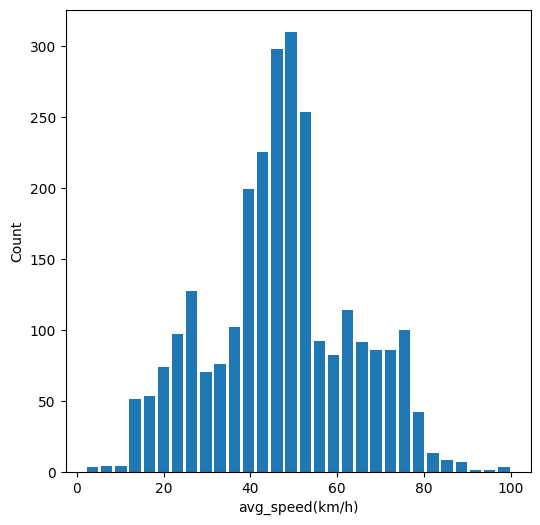

In [20]:
plt.figure(figsize=(6,6))
plt.hist(X_train['avg_speed(km/h)'], bins=30, rwidth=0.8)
plt.xlabel('avg_speed(km/h)')
plt.ylabel('Count')
plt.show()

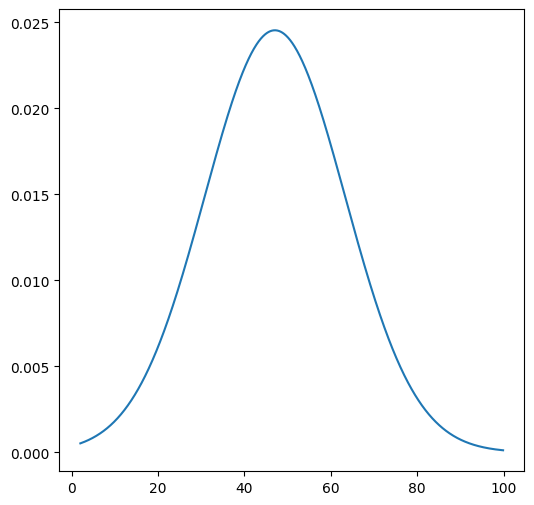

In [21]:
plt.figure(figsize=(6,6))
rng = np.arange(X_train['avg_speed(km/h)'].min(), X_train['avg_speed(km/h)'].max(), 0.1)
plt.plot(rng, norm.pdf(rng, X_train['avg_speed(km/h)'].mean(), X_train['avg_speed(km/h)'].std()))
plt.show()

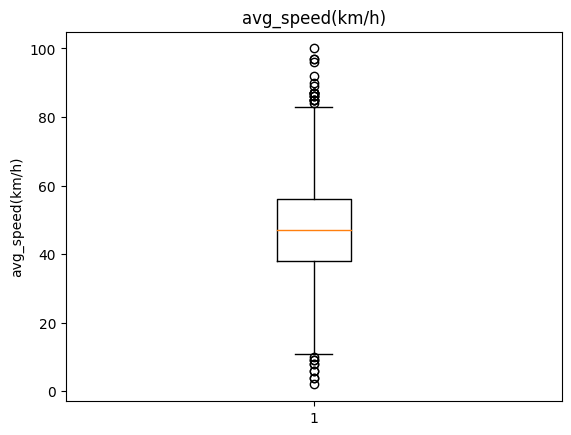

In [22]:
plt.boxplot(X_train['avg_speed(km/h)'])
plt.ylabel('avg_speed(km/h)')
plt.title('avg_speed(km/h)')
plt.show()

In [23]:
# We can see from the bell shaped curve that the data for average speed is normalized
# Thus removing outliers depending upon the z-score

X_train['Speed_z_score'] = (X_train['avg_speed(km/h)'] - X_train['avg_speed(km/h)'].mean())/X_train['avg_speed(km/h)'].std()
X_test['Speed_z_score'] = (X_test['avg_speed(km/h)'] - X_test['avg_speed(km/h)'].mean())/X_test['avg_speed(km/h)'].std()

# Reomving inputes with z-score of more than 3 or less than -3 for average speed
to_be_included_train = (X_train['Speed_z_score']<3) | (X_train['Speed_z_score']>-3)
to_be_included_test = (X_test['Speed_z_score']<3) | (X_test['Speed_z_score']>-3)

X_train = X_train[to_be_included_train]
Y_train = Y_train[to_be_included_train]

X_test = X_test[to_be_included_test]
Y_test = Y_test[to_be_included_test]

X_train.drop(['Speed_z_score'], axis=1, inplace=True)
X_test.drop(['Speed_z_score'], axis=1, inplace=True)

print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(2672, 14) (2672,) (669, 14) (669,)


**Quantity**

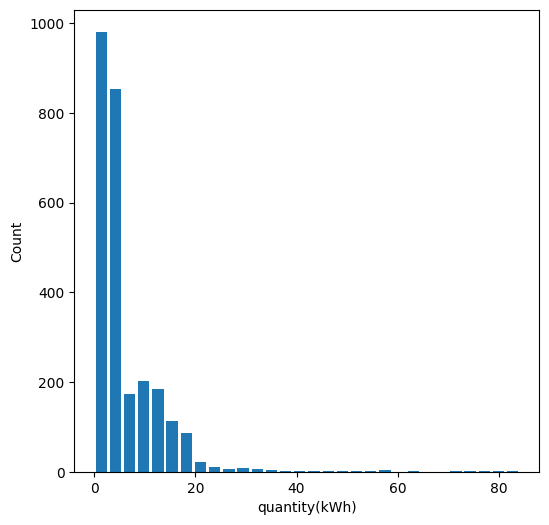

In [24]:
plt.figure(figsize=(6,6))
plt.hist(X_train['quantity(kWh)'], bins=30, rwidth=0.8)
plt.xlabel('quantity(kWh)')
plt.ylabel('Count')
plt.show()

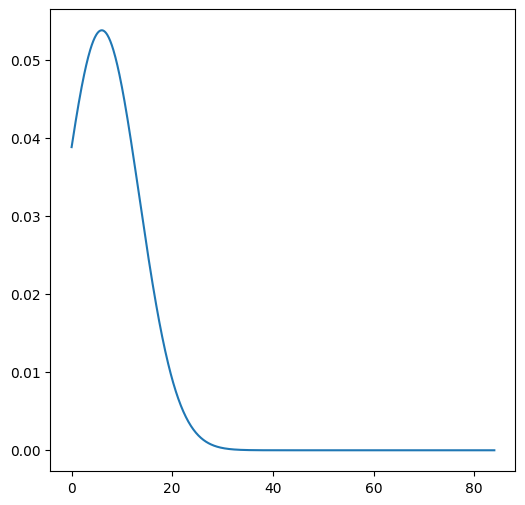

In [25]:
plt.figure(figsize=(6,6))
rng = np.arange(X_train['quantity(kWh)'].min(), X_train['quantity(kWh)'].max(), 0.1)
plt.plot(rng, norm.pdf(rng, X_train['quantity(kWh)'].mean(), X_train['quantity(kWh)'].std()))
plt.show()

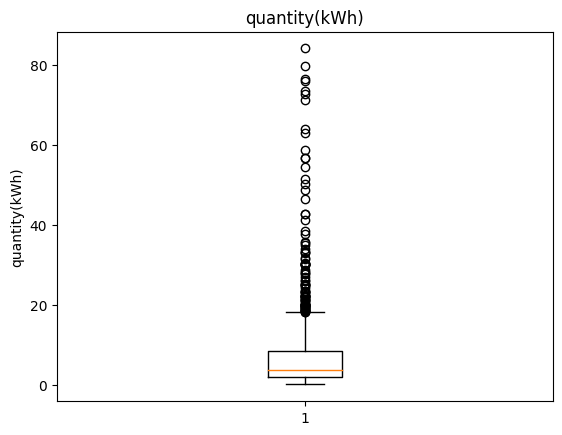

In [26]:
plt.boxplot(X_train['quantity(kWh)'])
plt.ylabel('quantity(kWh)')
plt.title('quantity(kWh)')
plt.show()

In [27]:
# We can see from the bell shaped curve that the data for average speed is normalized
# Thus removing outliers depending upon the z-score

# X_train['quan_z_score'] = (X_train['quantity(kWh)'] - X_train['quantity(kWh)'].mean())/X_train['quantity(kWh)'].std()
# X_test['quan_z_score'] = (X_test['quantity(kWh)'] - X_test['quantity(kWh)'].mean())/X_test['quantity(kWh)'].std()

# # Reomving inputes with z-score of more than 3 or less than -3 for average speed
# to_be_included_train = (X_train['quan_z_score']<3) | (X_train['quan_z_score']>-3)
# to_be_included_test = (X_test['quan_z_score']<3) | (X_test['quan_z_score']>-3)

# X_train = X_train[to_be_included_train]
# Y_train = Y_train[to_be_included_train]

# X_test = X_test[to_be_included_test]
# Y_test = Y_test[to_be_included_test]

# X_train.drop(['quan_z_score'], axis=1, inplace=True)
# X_test.drop(['quan_z_score'], axis=1, inplace=True)

# print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

In [28]:
# From the curve it is concluded that the Quantity(kWh) is not distributed normally
# Hence, removing all the rows with Quantity(kWh) greater than 65kWh

to_be_included_train = X_train['quantity(kWh)']<=65
to_be_included_test = X_test['quantity(kWh)']<=65

X_train = X_train[to_be_included_train]
Y_train = Y_train[to_be_included_train]

X_test = X_test[to_be_included_test]
Y_test = Y_test[to_be_included_test]

print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

X_train.reset_index(level=None, drop=True, inplace=True, col_level=0, col_fill='')
X_test.reset_index(level=None, drop=True, inplace=True, col_level=0, col_fill='')
Y_train.reset_index(level=None, drop=True, inplace=True)
Y_test.reset_index(level=None, drop=True, inplace=True)

(2665, 14) (2665,) (668, 14) (668,)


**Correlation  between features**

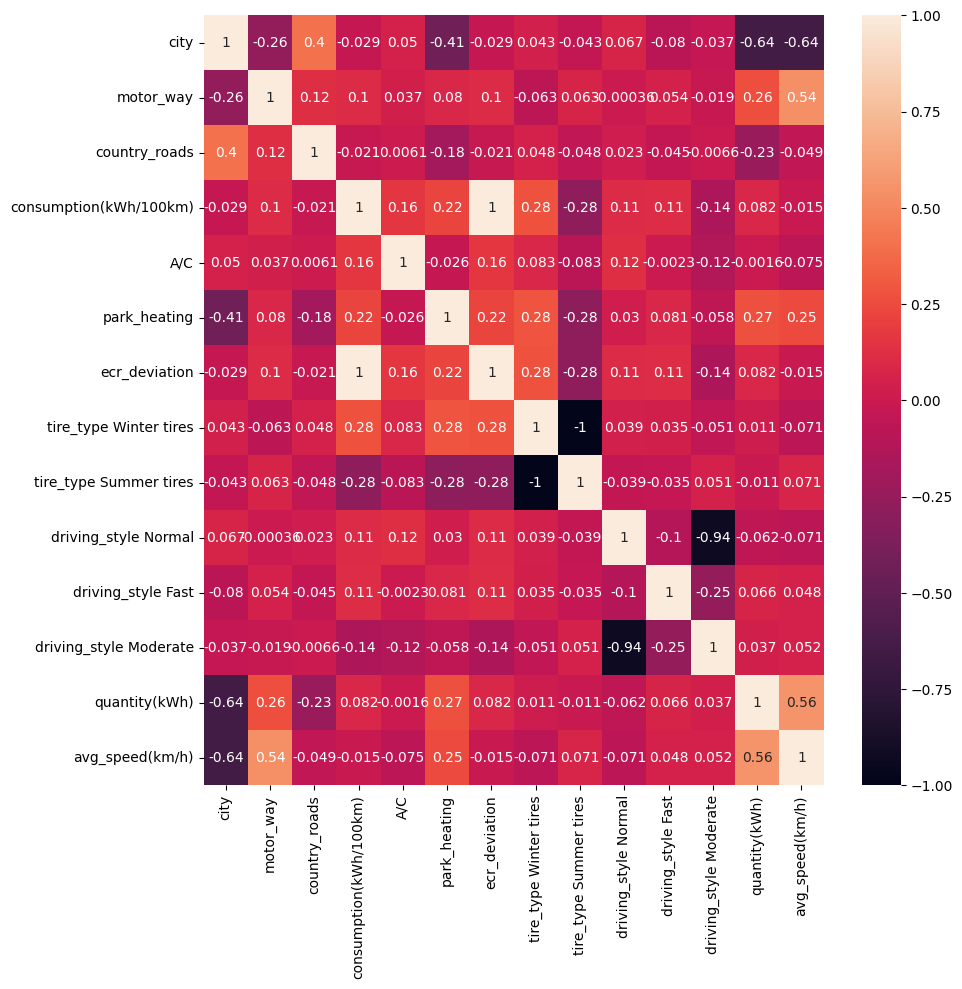

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
sns.heatmap(X_train.corr(method='pearson'), annot=True)
plt.show()

As it could be seen from the heatmap that the Driving_Style Normal & Driving_Style Moderate are possessing strong negative correlation, one of them needs to be dropped. Same goes for Summer & winter tire types.

In [30]:
X_train = X_train.drop(['driving_style Normal', 'tire_type Summer tires'], axis=1)
X_test = X_test.drop(['driving_style Normal', 'tire_type Summer tires'], axis=1)

**Machine learning model**

In [31]:
import tensorflow as tf
import tensorflowjs
import keras
from keras.models import Sequential
from keras.layers import Dense,LSTM
from keras import regularizers

* Normalizing the continuos features

In [32]:
cols_to_be_normalized = ['quantity(kWh)', 'avg_speed(km/h)']

for each in cols_to_be_normalized:
    mean = X_train[each].mean()
    std = X_train[each].std()

    X_train[each] = (X_train[each] - mean)/std
    X_test[each] = (X_test[each] - mean)/std

In [33]:
X_train

,city,motor_way,country_roads,consumption(kWh/100km),A/C,park_heating,ecr_deviation,tire_type Winter tires,driving_style Fast,driving_style Moderate,quantity(kWh),avg_speed(km/h)
0,1,0,0,16.7,0,0,-0.1,1,0,1,-0.788073,-1.971593
1,0,1,0,16.3,0,1,-0.5,0,0,0,1.537636,1.110180
2,1,0,0,12.3,0,1,-4.5,1,0,1,-0.763446,-1.047061
3,1,1,1,16.8,0,0,0.0,0,0,1,-0.372493,0.000742
4,0,1,0,11.7,0,0,-5.1,0,0,1,0.935814,1.603264
...,...,...,...,...,...,...,...,...,...,...,...,...
2660,0,1,1,16.1,0,1,-0.7,1,0,1,0.252416,0.802003
2661,1,1,1,10.1,0,0,-6.7,0,0,1,-0.507941,-0.492342
2662,1,1,1,8.1,0,0,-8.7,0,0,0,-0.597214,-0.430706
2663,1,0,1,9.7,0,0,-7.1,0,0,1,-0.572587,-0.800519


In [34]:
X_test

,city,motor_way,country_roads,consumption(kWh/100km),A/C,park_heating,ecr_deviation,tire_type Winter tires,driving_style Fast,driving_style Moderate,quantity(kWh),avg_speed(km/h)
0,1,1,1,9.8,0,0,-7.0,1,0,1,-0.594135,-0.307435
1,1,0,0,13.6,0,0,-3.2,0,0,0,-0.854258,-1.416874
2,0,1,0,14.1,0,1,-2.7,0,0,0,-0.317082,0.308919
3,1,0,1,13.3,0,0,-3.5,1,0,1,0.434040,-0.615613
4,1,0,1,11.8,0,0,-5.0,1,0,1,-0.249358,0.062377
...,...,...,...,...,...,...,...,...,...,...,...,...
663,1,0,1,8.5,0,0,-8.3,1,0,1,-0.618762,0.308919
664,1,1,1,9.5,0,0,-7.3,1,0,1,-0.603371,0.247284
665,1,0,0,12.5,0,0,-4.3,0,0,1,-0.857336,-1.848322
666,1,1,1,16.9,0,0,0.1,0,0,1,-0.375571,-0.060894


* Building model (Sequential)

In [35]:
# model = Sequential()
# model.add(Dense(units=32, activation='relu', input_dim=len(X_train.columns)))
# model.add(Dense(units=32, activation='relu'))
# model.add(Dense(units=1, activation='linear')) 

# batch_size = 16     # batch size for model fitting

# epochs = 1000       # number of epochs for model fitting

# STEPS_PER_EPOCH = X_train.shape[0]/batch_size

# es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50,verbose=0) # Early stopping to prevent overfitting
 
# lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(                  # Using a dynamic learning rate that decays a certain rate per 100 epochs
#   0.001,
#   decay_steps=STEPS_PER_EPOCH*100,
#   decay_rate=0.98,
#   staircase=False)        

# opt = keras.optimizers.RMSprop(lr_schedule)   # Using RMSprop optimizer with the learning rate schedule as mentioned above

# model.compile(loss='mae', optimizer=opt, metrics=['mae'])
# model.summary()

In [36]:
# hi

In [47]:
model = Sequential()
model.add(LSTM(16, input_shape=(len(X_train.columns),1)))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='linear')) 

batch_size = 32     # batch size for model fitting

epochs = 1000       # number of epochs for model fitting

STEPS_PER_EPOCH = X_train.shape[0]/batch_size

es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50,verbose=0) # Early stopping to prevent overfitting
 
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(                  # Using a dynamic learning rate that decays a certain rate per 100 epochs
  0.001,
  decay_steps=STEPS_PER_EPOCH*100,
  decay_rate=0.98,
  staircase=False)        

opt = keras.optimizers.RMSprop(lr_schedule)   # Using RMSprop optimizer with the learning rate schedule as mentioned above

model.compile(loss='mae', optimizer=opt, metrics=['mae'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 16)                1152      
                                                                 
 dense_3 (Dense)             (None, 32)                544       
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,785
Trainable params: 2,785
Non-trainable params: 0
_________________________________________________________________


* Training the model

In [48]:
hs = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, callbacks=[es], validation_split=0.2, validation_data=None, verbose=1)

Epoch 1/1000
67/67 [==============================] - 4s 21ms/step - loss: 37.4225 - mae: 37.4225 - val_loss: 30.3947 - val_mae: 30.3947
Epoch 2/1000
67/67 [==============================] - 1s 9ms/step - loss: 26.7377 - mae: 26.7377 - val_loss: 26.6385 - val_mae: 26.6385
Epoch 3/1000
67/67 [==============================] - 1s 7ms/step - loss: 25.8925 - mae: 25.8925 - val_loss: 25.7649 - val_mae: 25.7649
Epoch 4/1000
67/67 [==============================] - 0s 7ms/step - loss: 24.6533 - mae: 24.6533 - val_loss: 23.5413 - val_mae: 23.5413
Epoch 5/1000
67/67 [==============================] - 0s 6ms/step - loss: 21.7185 - mae: 21.7185 - val_loss: 19.4767 - val_mae: 19.4767
Epoch 6/1000
67/67 [==============================] - 0s 5ms/step - loss: 17.2830 - mae: 17.2830 - val_loss: 15.0687 - val_mae: 15.0687
Epoch 7/1000
67/67 [==============================] - 0s 5ms/step - loss: 14.5906 - mae: 14.5906 - val_loss: 14.1909 - val_mae: 14.1909
Epoch 8/1000
67/67 [===========================

In [39]:
h=hs.history
h.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

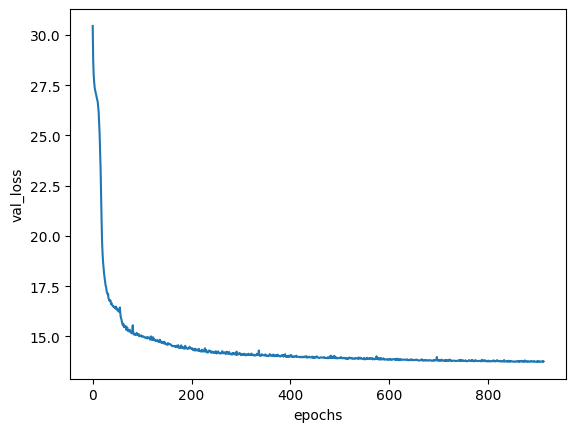

In [40]:
plt.ylabel('val_loss')
plt.xlabel('epochs')
plt.plot(h['val_loss'])
plt.show()

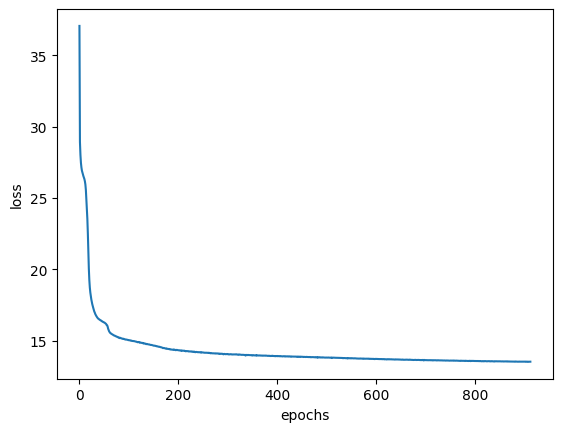

In [41]:
plt.ylabel('loss')
plt.xlabel('epochs')
plt.plot(h['loss'])
plt.show()

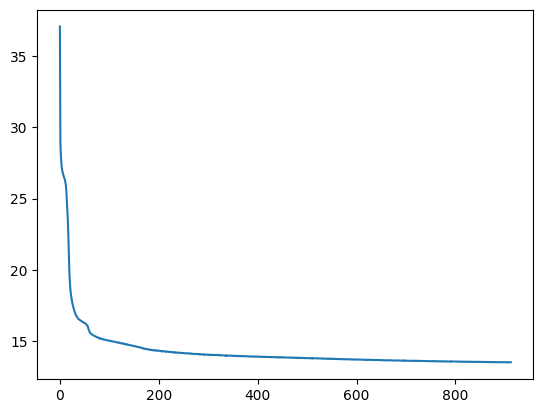

In [42]:
plt.plot(h['mae'])

* Testing

In [46]:
# nsamples, nx, ny = X_test.shape
# test_dataset = X_test.reshape((nsamples,nx*ny))

In [49]:
from sklearn.metrics import mean_absolute_error
predictions = (model.predict(X_test))
print(mean_absolute_error(Y_test, predictions))

21/21 [==============================] - 1s 2ms/step
6.347652860922728


In [50]:
#Accuracy of model
acc = 1 - np.sqrt(mean_absolute_error(Y_test, predictions))
acc

-1.519454873761927

In [51]:
compare = pd.concat([pd.DataFrame(predictions), pd.DataFrame(Y_test)], axis=1)
compare.columns = ['Predictions', 'Actual Output']
compare

,Predictions,Actual Output
0,19.778841,20.0
1,1.648872,2.0
2,31.299074,75.0
3,64.378647,65.0
4,34.295597,36.0
...,...,...
663,20.699787,21.0
664,19.583174,20.0
665,1.314322,2.0
666,19.661352,20.0


* standard deviation of the test labels

In [52]:
Y_test.std()

43.874796155174515

* As per the research paper (https://sci-hub.se/10.1109/ICSPIS48872.2019.9066042), a model having a MAE of less than 10% of standard deviation of the label (for regression), i.e. 4.884 km in our case, is considered as an excellent model. the MAE of our model for test data is 6.68 (approximately). Hence, it can considered as a reliable model.

* Saving the model

In [53]:
import tensorflowjs

model.save('./range_prediction_model.h5')
tensorflowjs.converters.save_keras_model(model, './/JSON')